<div style="text-align: right"><sub>This notebook is distributed under the <a href="https://creativecommons.org/licenses/by-sa/4.0/" target="_blank">Attribution-ShareAlike 4.0 International (CC BY-SA 4.0) license</a>.</sub></div>
<h1>Hands on Machine Learning  <span style="font-size:12px;"><i>by <a href="https://webgrec.ub.edu/webpages/000004/cat/dmaluenda.ub.edu.html" target="_blank">David Maluenda</a></i></span></h1>

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a href="https://atenea.upc.edu/course/view.php?id=71605" target="_blank">
      <img src="https://github.com/dmaluenda/hands_on_machine_learning/raw/master/resources/upc_logo_49px.png" width="130"/>
    </a>
  </td>
  <td>
  </td>
  <td>   <!-- gColab -->
    <a href="https://colab.research.google.com/github/dmaluenda/hands_on_machine_learning/blob/master/05_Reinforcement_Learning.ipynb" target="_blank">
      <img src="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/resources/colab_logo_32px.png" />
      Run in Google Colab
    </a>
  </td>
  <td>   <!-- github -->
    <a href="https://github.com/dmaluenda/hands_on_machine_learning/blob/master/05_Reinforcement_Learning.ipynb" target="_blank">
      <img src="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/resources/github_logo_32px.png" />
      View source on GitHub
    </a>
  </td>
  <td>   <!-- download -->
    <a href="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/05_Reinforcement_Learning.ipynb"  target="_blank"
          download="03_Reinforcement_Learning">
      <img src="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/resources/download_logo_32px.png" />
      Download notebook
      </a>
  </td>
</table>

# $\text{V}$. Reinforcement Learning

Hands on "Machine Learning on Classical and Quantum data" course of
[Master in Photonics - PHOTONICS BCN](https://photonics.masters.upc.edu/en/general-information)
[[UPC](https://photonics.masters.upc.edu/en) +
[UB](https://www.ub.edu/web/ub/en/estudis/oferta_formativa/master_universitari/fitxa/P/M0D0H/index.html?) +
[UAB](https://www.uab.cat/en/uab-official-masters-degrees-study-guides/) +
[ICFO](https://www.icfo.eu/lang/studies/master-studies)].

Tutorial 5

This notebook shows how to:
- solve a challenge with reinforcement learning
- implement the Actor-Critic method
- implement the Deep Deterministic Policy Gradient

**References**:

[1] [Keras](https://keras.io/getting_started/): a deep learning API written in Python.<br>
[2] [Keras examples](https://keras.io/examples/rl/).<br>
[3] Gym, a toolkit for developing and comparing reinforcement learning algorithms. By [OpenAI](https://gym.openai.com).

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#0.-Imports:-Basically-numpy,-matplotlib,-tensorflow-and-gym" data-toc-modified-id="0.-Imports:-Basically-numpy,-matplotlib,-tensorflow-and-gym-0">0. Imports: Basically numpy, matplotlib, tensorflow and gym</a></span></li><li><span><a href="#1.-Actor-Critic-Method-(CartPole-game-from-OpenAI-gym)" data-toc-modified-id="1.-Actor-Critic-Method-(CartPole-game-from-OpenAI-gym)-1">1. Actor Critic Method (CartPole game from OpenAI gym)</a></span><ul class="toc-item"><li><span><a href="#1.1-Configuration-parameters-for-the-whole-setup" data-toc-modified-id="1.1-Configuration-parameters-for-the-whole-setup-1.1">1.1 Configuration parameters for the whole setup</a></span></li><li><span><a href="#1.2-Playing-function" data-toc-modified-id="1.2-Playing-function-1.2">1.2 Playing function</a></span></li><li><span><a href="#1.3-Neural-network-player-(DQN)" data-toc-modified-id="1.3-Neural-network-player-(DQN)-1.3">1.3 Neural network player (DQN)</a></span></li><li><span><a href="#1.4-Reinforcement-training" data-toc-modified-id="1.4-Reinforcement-training-1.4">1.4 Reinforcement training</a></span></li><li><span><a href="#1.5-Playing" data-toc-modified-id="1.5-Playing-1.5">1.5 Playing</a></span></li><li><span><a href="#1.6-[EXERCISE]:-Try-with-a-different-Agent-model-(different-number-of-hidden-layers/neurons)-to-solve-the-problem-with-less-episodes." data-toc-modified-id="1.6-[EXERCISE]:-Try-with-a-different-Agent-model-(different-number-of-hidden-layers/neurons)-to-solve-the-problem-with-less-episodes.-1.6">1.6 [EXERCISE]: Try with a different Agent model (different number of hidden layers/neurons) to solve the problem with less episodes.</a></span></li></ul></li><li><span><a href="#2.-Inverted-Pendulum-game-from-OpenAI-gym-(DDPG)" data-toc-modified-id="2.-Inverted-Pendulum-game-from-OpenAI-gym-(DDPG)-2">2. Inverted Pendulum game from OpenAI gym (DDPG)</a></span><ul class="toc-item"><li><span><a href="#2.1-Deep-Deterministic-Policy-Gradient-(DDPG)" data-toc-modified-id="2.1-Deep-Deterministic-Policy-Gradient-(DDPG)-2.1">2.1 Deep Deterministic Policy Gradient (DDPG)</a></span></li><li><span><a href="#2.2-Useful-classes" data-toc-modified-id="2.2-Useful-classes-2.2">2.2 Useful classes</a></span><ul class="toc-item"><li><span><a href="#2.2.1-The-OUActionNoise-class" data-toc-modified-id="2.2.1-The-OUActionNoise-class-2.2.1">2.2.1 The OUActionNoise class</a></span></li><li><span><a href="#2.2.2-The-Buffer-class" data-toc-modified-id="2.2.2-The-Buffer-class-2.2.2">2.2.2 The Buffer class</a></span></li></ul></li><li><span><a href="#2.3-NNs-definition" data-toc-modified-id="2.3-NNs-definition-2.3">2.3 NNs definition</a></span></li><li><span><a href="#2.4-Policy-definition-and-training" data-toc-modified-id="2.4-Policy-definition-and-training-2.4">2.4 Policy definition and training</a></span></li><li><span><a href="#2.5-Playing" data-toc-modified-id="2.5-Playing-2.5">2.5 Playing</a></span></li></ul></li></ul></div>

## 0. Imports: Basically numpy, matplotlib, tensorflow and gym

`!pip install gym`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import gym

from time import sleep

## 1. Actor Critic Method (CartPole game from OpenAI gym)

Code base on https://keras.io/examples/rl/actor_critic_cartpole/

Game documentation: https://gym.openai.com/envs/CartPole-v1/

* **Description**

    This environment corresponds to the version of the cart-pole problem
    described by Barto, Sutton, and Anderson in ["Neuronlike Adaptive Elements That Can Solve Difficult Learning Control Problem"](https://ieeexplore.ieee.org/document/6313077).
    
    A pole is attached by an un-actuated joint to a cart, which moves along a
    frictionless track. The pendulum is placed upright on the cart and the goal is to balance the pole by applying forces in the left and right direction on the cart.
    

* **Action Space**

    The action is a `ndarray` with shape `(1,)` which can take values `{0, 1}` indicating the direction of the fixed force the cart is pushed with.
    
    | Num | Action                 |
    |-----|:-----------------------|
    | 0   | Push cart to the left  |
    | 1   | Push cart to the right |

    **Note**: The velocity that is reduced or increased by the applied force is not fixed and it depends on the angle the pole is pointing. The center of gravity of the pole varies the amount of energy needed to move the cart underneath it.


* **State Space**

    The observation is a `ndarray` with shape `(4,)` with the values corresponding to the following positions and velocities:
    
    | Num | Observation           | Min                  | Max                |
    |-----|-----------------------|----------------------|--------------------|
    | 0   | Cart Position         | -4.8                 | 4.8                |
    | 1   | Cart Velocity         | -Inf                 | Inf                |
    | 2   | Pole Angle            | ~ -0.418 rad (-24°)  | ~ 0.418 rad (24°)  |
    | 3   | Pole Angular Velocity | -Inf                 | Inf                |

    **Note:** While the ranges above denote the possible values for observation space of each element, it is not reflective of the allowed values of the state space in an unterminated episode. Particularly:
    -  The cart x-position (index 0) can be take values between `(-4.8, 4.8)`, but the episode terminates if the cart leaves the `(-2.4, 2.4)` range.
    -  The pole angle can be observed between  `(-.418, .418)` radians (or **±24°**), but the episode terminates if the pole angle is not in the range `(-.2095, .2095)` (or **±12°**)


* **Rewards**

    Since the goal is to keep the pole upright for as long as possible, a reward of `+1` for every step taken, including the termination step, is allotted. The threshold for rewards is 475 for v1.


* **Starting State**

    All observations are assigned a uniformly random value in `(-0.05, 0.05)`


* **Episode Termination**

    The episode terminates if any one of the following occurs:
    1. Pole Angle is greater than ±12°
    2. Cart Position is greater than ±2.4 (center of the cart reaches the edge of the display)
    3. Episode length is greater than 500 (200 for v0)

### 1.1 Configuration parameters for the whole setup

In [2]:
env = gym.make("CartPole-v1")  # Create the environment

print(f"current state: {env.reset()}")
env.render()  # This creates a figure, open it and make it visible

action = 0  # move to left (or right) is 0 (or 1)
state, reward, done, info = env.step(action)

print(f"new state: {state}")
print(f"reward: {reward}")
print(f"done: {done}")
print(f"info: {info}")

current state: [-0.04096106 -0.01867978  0.03321726 -0.02079476]
new state: [-0.04133466 -0.21426196  0.03280136  0.28218076]
reward: 1.0
done: False
info: {}


### 1.2 Playing function

In [3]:
def play(environ, player=None, is_discrete=True, reward_to_win=300):

    cum_reward = 0
    rewards_list = []
    state = environ.reset()

    print("Let's play: ", flush=True, end='')
    environ.render()
    sleep(1)
    
    while True:
               
        if player:  # chose an action from a given state
            state = np.expand_dims(state, 0)
            
            output = player(state)
            
            action = output[0]
            if is_discrete:
                # chose an action according to its probability
                action = np.random.choice(num_actions, p=np.squeeze(action))
        
        else:  # random action
            action = environ.action_space.sample()  # No player is random player
        
        # just to print the taken action
        action_str = ('L, ' if action == 0 else 'R, ' if is_discrete 
                      else ("%.2f, " % action))
        print(action_str, flush=True, end='')
        
        # apply an action an render it
        state, reward, done, info = environ.step(action)
        environ.render()
        
        # take note of the reward
        cum_reward += reward
        rewards_list.append(reward)
        if done:  # The environ decides when its enough (game's rule)
            print("Done!")
            final_mark = cum_reward if is_discrete else np.array(rewards_list[-40:]).mean()
            win_lost = "YOU WIN!" if final_mark >= reward_to_win else "Sorry, try again..."
            print("The total reward is %.2f." % final_mark, win_lost)
            break

In [5]:
play(env, reward_to_win=300)  # Random player just to see

Let's play: L, R, L, L, R, R, L, L, R, L, R, R, R, L, L, L, L, L, L, R, L, L, L, R, Done!
The total reward is 24.00. Sorry, try again...


### 1.3 Neural network player (DQN)

The Agent is a single NN with two separate output layers, one for Actor, one for Critic.

* **Actor** try to decide which action is better. In this case we have to possible actions (move to left or to right), then a two softmax neurons as output is the choice.

* **Critic** try to estimate the next reward, according to the current state. A single output neuron is enough.

In both cases we use the same input block containing the input layer (with as many neurons like the state shape) and a hidden layer of a certain number of neurons.

In [6]:
num_inputs = 4    # state space
num_actions = 2   # action space
num_hidden = 128  # free hyper-parameter

inputs = layers.Input(shape=(num_inputs,))
hidden = layers.Dense(num_hidden, activation="relu")(inputs)
action = layers.Dense(num_actions, activation="softmax")(hidden)
critic = layers.Dense(1)(hidden)

model = keras.Model(inputs=inputs, outputs=[action, critic])

optimizer = keras.optimizers.Adam(learning_rate=0.01)
huber_loss = keras.losses.Huber()

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          640         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 2)            258         ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 1)            129         ['dense[0][0]']                  
                                                                                              

More info about Huber loss: https://en.wikipedia.org/wiki/Huber_loss

In [11]:
state = env.reset()
state = np.expand_dims(state, 0)  # we have to add an extra dimension at first, why?
print("state:", state)
action_probs, critic_value = model(state)
print("action_probs:", action_probs)
print("critic_values:", critic_value)

state: [[ 2.8790185e-02 -9.3150760e-05  1.3991545e-03 -2.0828255e-02]]
action_probs: tf.Tensor([[0.5005359 0.4994641]], shape=(1, 2), dtype=float32)
critic_values: tf.Tensor([[0.0054117]], shape=(1, 1), dtype=float32)


Why all inputs and outputs have one extra dimension in the first place?

### 1.4 Reinforcement training

In [12]:
gamma = 0.99  # Discount factor for past rewards
max_steps_per_episode = 10000

action_probs_history = []
critic_value_history = []
rewards_history = []
running_reward = 0
episode_count = 0

# eps avoid dividing by zero
eps = np.finfo(np.float32).eps.item()  # Smallest number such that 1.0 + eps != 1.0

while True:  # Run until solved
    # Each loop is a new game
    state = env.reset()
    episode_reward = 0
    
    do_show = episode_count % 10 == 0  # show some progress

    with tf.GradientTape() as tape:
        
        if do_show:
            print("Playing episode %d..." % episode_count, flush=True, end='')
            
        for timestep in range(1, max_steps_per_episode):
            """ Loop over one episode """

            if do_show:
                env.render()
            
            # Predict action probabilities and estimated future rewards
            # from environment state
            action_probs, critic_value = model(np.expand_dims(state, 0))
            critic_value_history.append(critic_value[0, 0])

            # Sample action from action probability distribution
            action = np.random.choice(num_actions, p=np.squeeze(action_probs))
            action_probs_history.append(tf.math.log(action_probs[0, action]))
            
            # Apply the sampled action in our environment
            state, reward, done, _ = env.step(action)
            rewards_history.append(reward)
            episode_reward += reward

            if done:
                break  # for loop over time steps of a certaon episode

        # Update running reward to check condition for solving
        running_reward = 0.05 * episode_reward + (1 - 0.05) * running_reward

        # Calculate expected value from rewards
        # - At each timestep what was the total reward received after that timestep
        # - Rewards in the past are discounted by multiplying them with gamma
        # - These are the labels for our critic
        returns = []  # ground truth for critic
        discounted_sum = 0
        for r in rewards_history[::-1]:
            discounted_sum = r + gamma * discounted_sum
            returns.insert(0, discounted_sum)

        # Normalize returns
        returns = np.array(returns)
        returns = (returns - np.mean(returns)) / (np.std(returns) + eps)
        returns = returns.tolist()

        # Calculating loss values to update our network
        history = zip(action_probs_history, critic_value_history, returns)
        actor_losses = []
        critic_losses = []
        for log_prob, value, ret in history:
            # At this point in history, the critic estimated that we would get a
            # total reward = `value` in the future. 
            # We took an action with log probability of `log_prob` and 
            # ended up receiving a total reward = `ret`.
            # The actor must be updated so that it predicts an action that leads 
            # to high rewards (compared to critic's estimate) with high probability.
            diff = ret - value
            actor_losses.append(-log_prob * diff)  # actor loss

            # The critic must be updated so that it predicts a better estimate of
            # the future rewards.
            critic_losses.append(
                huber_loss(tf.expand_dims(value, 0), tf.expand_dims(ret, 0))
                    )

        # Backpropagation
        loss_value = sum(actor_losses) + sum(critic_losses)
        grads = tape.gradient(loss_value, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        # Clear the loss and reward history
        action_probs_history.clear()
        critic_value_history.clear()
        rewards_history.clear()

    # Log details
    episode_count += 1
    if do_show:
        print(" reward of %.2f" % running_reward, flush=True)

    if running_reward > 300:  # Condition to consider the task solved
        print("Solved at episode {}!".format(episode_count))
        break

Playing episode 0... reward of 0.95
Playing episode 10... reward of 10.28
Playing episode 20... reward of 23.46
Playing episode 30... reward of 24.67
Playing episode 40... reward of 21.98
Playing episode 50... reward of 18.49
Playing episode 60... reward of 17.95
Playing episode 70... reward of 33.49
Playing episode 80... reward of 54.80
Playing episode 90... reward of 59.43
Playing episode 100... reward of 79.92
Playing episode 110... reward of 105.36
Playing episode 120... reward of 154.59
Playing episode 130... reward of 248.01
Solved at episode 137!


### 1.5 Playing

In [15]:
play(env, model)

Let's play: R, L, R, L, L, R, L, L, R, R, L, L, R, R, R, R, R, L, R, L, L, L, R, R, L, R, R, R, R, R, R, L, R, L, L, R, L, R, R, L, L, R, L, R, L, L, L, R, L, L, R, L, L, R, R, L, L, R, R, L, L, L, L, R, L, L, R, R, L, R, R, L, R, L, L, L, R, L, R, L, R, R, L, R, L, L, L, L, L, R, R, R, L, L, R, R, L, L, R, L, R, R, L, R, L, R, R, R, R, L, R, R, R, R, R, L, R, R, R, L, R, L, L, L, R, L, L, L, L, R, L, L, R, R, L, L, R, L, L, L, R, R, L, L, L, L, R, L, R, L, R, R, R, L, R, L, R, R, L, R, R, L, R, R, R, L, R, R, L, R, R, R, L, R, L, L, R, L, L, L, R, R, L, L, L, R, L, L, R, L, R, R, L, L, R, L, R, R, L, L, R, R, L, L, R, R, L, L, L, R, R, L, R, L, L, R, L, L, L, R, R, R, R, R, R, L, R, L, R, L, L, L, R, L, R, L, R, L, L, L, R, R, L, L, L, R, L, R, L, R, L, L, R, R, R, R, L, L, L, R, R, R, L, R, R, L, L, L, R, L, R, L, L, R, R, R, R, L, R, R, L, L, R, L, R, R, R, R, R, L, R, R, R, L, L, R, L, L, L, L, L, R, L, R, L, R, L, R, L, L, L, R, R, L, L, L, R, R, L, L, L, L, R, R, R, L, R, L, L, R

In [16]:
env.close()

### 1.6 [EXERCISE]: Try with a different Agent model (different number of hidden layers/neurons) to solve the problem with less episodes.

## 2. Inverted Pendulum game from OpenAI gym (DDPG)

Code base on https://keras.io/examples/rl/ddpg_pendulum/

Game documentation https://gym.openai.com/envs/Pendulum-v0/

* **Description**

    The inverted pendulum swingup problem is based on the classic problem in control theory. The system consists of a pendulum attached at one end to a fixed point, and the other end being free. The pendulum starts in a random position and the goal is to apply torque on the free end to swing it into an upright position, with its center of gravity right above the fixed point.
    The diagram below specifies the coordinate system used for the implementation of the pendulum's
    dynamic equations.
    ![Pendulum Coordinate System](https://miro.medium.com/max/500/1*ygcr1p1hytn8p41ycjoSvQ.gif)
    -  `x-y`: cartesian coordinates of the pendulum's end in meters.
    - `theta` : angle in radians.
    - `tau`: torque in `N m`. Defined as positive _counter-clockwise_.


* **Action Space**

    The action is a `ndarray` with shape `(1,)` representing the torque applied to free end of the pendulum.
    | Num | Action | Min  | Max |
    |-----|--------|------|-----|
    | 0   | Torque | -2.0 | 2.0 |


* **State Space**

    The observation is a `ndarray` with shape `(3,)` representing the x-y coordinates of the pendulum's free end and its angular velocity.
    | Num | Observation      | Min  | Max |
    |-----|------------------|------|-----|
    | 0   | x = cos(theta)   | -1.0 | 1.0 |
    | 1   | y = sin(angle)   | -1.0 | 1.0 |
    | 2   | Angular Velocity | -8.0 | 8.0 |


* **Rewards**

    The reward function is defined as:
    $$r = -(\theta^2 + 0.1 * \omega^2 + 0.001 * \tau^2)$$
    where $\theta$ is the pendulum's angle normalized between $[-\pi, \pi]$ (with 0 being in the upright position), $\omega$ is the angular velocity and $\tau$ the applied torque.
    
    Based on the above equation, the minimum (worst) reward that can be obtained is $$-(\pi^2 + 0.1 * 8^2 + 0.001 * 2^2) = -16.273$$ while the maximum (best) reward is zero (pendulum is
    upright with zero velocity and no torque applied).


* **Starting State**

    The starting state is a random angle in $[-\pi, \pi]$ and a random angular velocity in $[-1,1]$.
    
    
* **Episode Termination**

    The episode terminates at 200 time steps.
    

* **Arguments**

    `g`: acceleration of gravity measured in *(m s<sup>-2</sup>)* used to calculate the pendulum dynamics. The default value is g = 10.0 .
    ```
    gym.make('Pendulum-v1', g=9.81)
    ```


In [17]:
env2 = gym.make("Pendulum-v1")

num_states = env2.observation_space.shape[0]
print("Size of State Space ->  {} : x, y, omega ".format(num_states))
num_actions = env2.action_space.shape[0]
print("Size of Action Space ->  {} : torque".format(num_actions))

upper_bound = env2.action_space.high[0]
lower_bound = env2.action_space.low[0]

print("Max Value of Action ->  {}".format(upper_bound))
print("Min Value of Action ->  {}".format(lower_bound))

env2.reset()
env2.render()

Size of State Space ->  3 : x, y, omega 
Size of Action Space ->  1 : torque
Max Value of Action ->  2.0
Min Value of Action ->  -2.0


True

In [19]:
play(env2, is_discrete=False, reward_to_win=-0.05)

Let's play: -1.92, -0.75, 0.72, -0.89, 1.24, 0.94, -0.39, 0.15, 0.86, 0.61, -0.18, -1.53, 0.64, -0.87, 0.76, 1.93, 0.60, 1.82, -0.62, -0.78, 1.18, 0.31, -0.50, -1.42, 1.45, -0.64, 0.66, -1.04, 1.45, 0.08, 0.91, 1.16, -1.90, -1.88, -1.81, -1.03, 0.79, -1.52, -0.99, 0.22, 1.24, -1.80, -0.50, -0.20, -1.93, -1.02, 1.14, 0.12, 0.18, -1.60, 0.94, -0.64, 0.49, 1.75, 1.37, -0.15, -1.48, -1.97, 0.43, -1.13, -1.97, 0.52, -0.48, -1.25, -1.11, -0.54, -0.08, -0.05, -0.03, 0.91, -0.90, -1.43, 1.43, -0.28, 0.00, 0.12, 0.22, 1.56, 1.76, -0.88, 0.84, 1.73, -0.61, -0.87, 1.91, -1.54, -0.04, -0.99, 1.56, 0.30, 0.95, -1.97, 0.06, -1.85, -0.62, 1.13, -0.40, 1.98, -1.26, -0.01, 1.81, -0.90, 0.04, 0.55, 1.94, -0.44, -0.17, -1.95, -1.04, 0.78, 1.58, 1.16, -0.90, -1.52, 1.94, 1.39, 0.53, 1.25, 1.78, -0.56, -0.24, -0.27, -1.09, 0.34, -0.30, 1.37, -1.80, -1.17, 1.65, 1.37, -0.94, 1.04, -1.52, -1.51, -0.68, -0.33, 1.45, -0.15, 1.41, -0.06, -1.70, -0.74, 0.30, -0.61, 0.62, -0.06, -0.60, -1.93, -0.30, 1.61, -0.99, 

### 2.1 Deep Deterministic Policy Gradient (DDPG)

Just like the Actor-Critic method, we have two networks:

* **Actor**: It proposes an action given a state.

* **Critic**: It predicts if the action is good (positive value) or bad (negative value) given a state and an action.

DDPG uses two more techniques not present in the original DQN:

**First, it uses two Target networks.**

Why? Because it add stability to training. In short, we are learning from estimated targets and Target networks are updated slowly, hence keeping our estimated targets stable.

Conceptually, this is like saying, "I have an idea of how to play this well, I'm going to try it out for a bit until I find something better", as opposed to saying "I'm going to re-learn how to play this entire game after every move". Check [this StackOverflow answer](https://stackoverflow.com/a/54238556/13475679).

**Second, it uses Experience Replay.**

We store list of tuples (state, action, reward, next_state), and instead of learning only from recent experience, we learn from sampling all of our experience accumulated so far.

Now, let's see how is it implemented.

### 2.2 Useful classes

#### 2.2.1 The OUActionNoise class

To implement better exploration by the Actor network, we use noisy perturbations, specifically an Ornstein-Uhlenbeck process for generating noise, as described in the paper. It samples noise from a correlated normal distribution.

In [20]:
class OUActionNoise:
    def __init__(self, mean, std_deviation, theta=0.15, dt=1e-2, x_initial=None):
        self.theta = theta
        self.mean = mean
        self.std_dev = std_deviation
        self.dt = dt
        self.x_initial = x_initial
        self.reset()

    def __call__(self):
        # Formula taken from https://www.wikipedia.org/wiki/Ornstein-Uhlenbeck_process.
        x = (
            self.x_prev
            + self.theta * (self.mean - self.x_prev) * self.dt
            + self.std_dev * np.sqrt(self.dt) * np.random.normal(size=self.mean.shape)
        )
        # Store x into x_prev
        # Makes next noise dependent on current one
        self.x_prev = x
        return x

    def reset(self):
        if self.x_initial is not None:
            self.x_prev = self.x_initial
        else:
            self.x_prev = np.zeros_like(self.mean)

#### 2.2.2 The Buffer class

The Buffer class implements Experience Replay.

![https://i.imgur.com/mS6iGyJ.jpg](https://i.imgur.com/mS6iGyJ.jpg)

* **Critic loss**: Mean Squared Error of y - Q(s, a) where y is the expected return as seen by the Target network, and Q(s, a) is action value predicted by the Critic network. y is a moving target that the critic model tries to achieve; we make this target stable by updating the Target model slowly.

* **Actor loss**: This is computed using the mean of the value given by the Critic network for the actions taken by the Actor network. We seek to maximize this quantity.

Hence we update the Actor network so that it produces actions that get the maximum predicted value as seen by the Critic, for a given state.



In [21]:
class Buffer:
    def __init__(self, buffer_capacity=100000, batch_size=64):
        # Number of "experiences" to store at max
        self.buffer_capacity = buffer_capacity
        # Num of tuples to train on.
        self.batch_size = batch_size

        # Its tells us num of times record() was called.
        self.buffer_counter = 0

        # Instead of list of tuples as the exp.replay concept go
        # We use different np.arrays for each tuple element
        self.state_buffer = np.zeros((self.buffer_capacity, num_states))
        self.action_buffer = np.zeros((self.buffer_capacity, num_actions))
        self.reward_buffer = np.zeros((self.buffer_capacity, 1))
        self.next_state_buffer = np.zeros((self.buffer_capacity, num_states))

    # Takes (s,a,r,s') observation tuple as input
    def record(self, obs_tuple):
        # Set index to zero if buffer_capacity is exceeded,
        # replacing old records
        index = self.buffer_counter % self.buffer_capacity

        self.state_buffer[index] = obs_tuple[0]
        self.action_buffer[index] = obs_tuple[1]
        self.reward_buffer[index] = obs_tuple[2]
        self.next_state_buffer[index] = obs_tuple[3]

        self.buffer_counter += 1

    # Eager execution is turned on by default in TensorFlow 2. Decorating with tf.function allows
    # TensorFlow to build a static graph out of the logic and computations in our function.
    # This provides a large speed up for blocks of code that contain many small TensorFlow operations such as this one.
    @tf.function
    def update(
        self, state_batch, action_batch, reward_batch, next_state_batch,
    ):
        # Training and updating Actor & Critic networks.
        # See Pseudo Code.
        with tf.GradientTape() as tape:
            target_actions = target_actor(next_state_batch, training=True)
            y = reward_batch + gamma * target_critic(
                [next_state_batch, target_actions], training=True
            )
            critic_value = critic_model([state_batch, action_batch], training=True)
            critic_loss = tf.math.reduce_mean(tf.math.square(y - critic_value))

        critic_grad = tape.gradient(critic_loss, critic_model.trainable_variables)
        critic_optimizer.apply_gradients(
            zip(critic_grad, critic_model.trainable_variables)
        )

        with tf.GradientTape() as tape:
            actions = actor_model(state_batch, training=True)
            critic_value = critic_model([state_batch, actions], training=True)
            # Used `-value` as we want to maximize the value given
            # by the critic for our actions
            actor_loss = -tf.math.reduce_mean(critic_value)

        actor_grad = tape.gradient(actor_loss, actor_model.trainable_variables)
        actor_optimizer.apply_gradients(
            zip(actor_grad, actor_model.trainable_variables)
        )

    # We compute the loss and update parameters
    def learn(self):
        # Get sampling range
        record_range = min(self.buffer_counter, self.buffer_capacity)
        # Randomly sample indices
        batch_indices = np.random.choice(record_range, self.batch_size)

        # Convert to tensors
        state_batch = tf.convert_to_tensor(self.state_buffer[batch_indices])
        action_batch = tf.convert_to_tensor(self.action_buffer[batch_indices])
        reward_batch = tf.convert_to_tensor(self.reward_buffer[batch_indices])
        reward_batch = tf.cast(reward_batch, dtype=tf.float32)
        next_state_batch = tf.convert_to_tensor(self.next_state_buffer[batch_indices])

        self.update(state_batch, action_batch, reward_batch, next_state_batch)


# This update target parameters slowly
# Based on rate `tau`, which is much less than one.
@tf.function
def update_target(target_weights, weights, tau):
    for (a, b) in zip(target_weights, weights):
        a.assign(b * tau + a * (1 - tau))


### 2.3 NNs definition

Here we define the Actor and Critic networks. These are basic Dense models with ReLU activation.

Note: We need the initialization for last layer of the Actor to be between -0.003 and 0.003 as this prevents us from getting 1 or -1 output values in the initial stages, which would squash our gradients to zero, as we use the tanh activation.

In [22]:
def get_actor():
    # Initialize weights between -3e-3 and 3-e3
    last_init = tf.random_uniform_initializer(minval=-0.003, maxval=0.003)

    inputs = layers.Input(shape=(num_states,))
    out = layers.Dense(256, activation="relu")(inputs)
    out = layers.Dense(256, activation="relu")(out)
    outputs = layers.Dense(1, activation="tanh", kernel_initializer=last_init)(out)

    # Our upper bound is 2.0 for Pendulum.
    outputs = outputs * upper_bound
    model = tf.keras.Model(inputs, outputs)
    return model


def get_critic():
    # State as input
    state_input = layers.Input(shape=(num_states))
    state_out = layers.Dense(16, activation="relu")(state_input)
    state_out = layers.Dense(32, activation="relu")(state_out)

    # Action as input
    action_input = layers.Input(shape=(num_actions))
    action_out = layers.Dense(32, activation="relu")(action_input)

    # Both are passed through separate layer before concatenating
    concat = layers.Concatenate()([state_out, action_out])

    out = layers.Dense(256, activation="relu")(concat)
    out = layers.Dense(256, activation="relu")(out)
    outputs = layers.Dense(1)(out)

    # Outputs single value for give state-action
    model = tf.keras.Model([state_input, action_input], outputs)

    return model

Let's initialize a couple of actor and critic pairs. One pair will be the stable ones and the other will be used to explore possibilities.

We also initialize the OUActionNoise and the Buffer classes. 

In [23]:
# Exploring pair
actor_model = get_actor()
critic_model = get_critic()

# Stable pair
target_actor = get_actor()
target_critic = get_critic()

# Making the weights equal initially
target_actor.set_weights(actor_model.get_weights())
target_critic.set_weights(critic_model.get_weights())

# Learning rate for actor-critic models
critic_lr = 0.002
actor_lr = 0.001

critic_optimizer = tf.keras.optimizers.Adam(critic_lr)
actor_optimizer = tf.keras.optimizers.Adam(actor_lr)

std_dev = 0.2
ou_noise = OUActionNoise(mean=np.zeros(1),  # this trigger the __init__ function
                         std_deviation=float(std_dev) * np.ones(1))

buffer = Buffer(50000, 64)

### 2.4 Policy definition and training

In [24]:
def policy(state, noise_object):
    """  returns an action sampled from our Actor network 
         plus some noise for exploration. """
    sampled_actions = tf.squeeze(actor_model(state))  # to take just the value
    noise = noise_object()    # this trigger the __call__ function
    # Adding noise to action
    sampled_actions = sampled_actions.numpy() + noise

    # We make sure action is within bounds
    legal_action = np.clip(sampled_actions, lower_bound, upper_bound)

    return [np.squeeze(legal_action)]

Now we implement our main training loop, and iterate over episodes. We sample actions using ``policy()`` and train with ``learn()`` at each time step, along with updating the Target networks at a rate ``tau``.

In [25]:
# Discount factor for future rewards
gamma = 0.99
# Used to update target networks
tau = 0.005
total_episodes = 50

# To store reward history of each episode
ep_reward_list = []
# To store average reward history of last few episodes
avg_reward_list = []

# Takes about 4 min to train
for ep in range(total_episodes):

    prev_state = env2.reset()
    episodic_reward = 0

    while True:
        if ep % 5 == 0:
            env2.render()

        tf_prev_state = np.expand_dims(prev_state, 0)

        action = policy(tf_prev_state, ou_noise)
        # Receive state and reward from environment.
        state, reward, done, info = env2.step(action)

        buffer.record((prev_state, action, reward, state))
        episodic_reward += reward

        buffer.learn()
        update_target(target_actor.variables, actor_model.variables, tau)
        update_target(target_critic.variables, critic_model.variables, tau)

        # End this episode when `done` is True
        if done:
            break

        prev_state = state

    ep_reward_list.append(episodic_reward)

    # Mean of last 40 episodes
    avg_reward = np.mean(ep_reward_list[-40:])
    print("Episode * {} * final_mark is ==> {}".format(ep, avg_reward))
    avg_reward_list.append(avg_reward)

Episode * 0 * final_mark is ==> -1209.1404639311402
Episode * 1 * final_mark is ==> -1280.471421762793
Episode * 2 * final_mark is ==> -1267.2018155597407
Episode * 3 * final_mark is ==> -1290.5416495504744
Episode * 4 * final_mark is ==> -1346.4921780934699
Episode * 5 * final_mark is ==> -1331.3988851837705
Episode * 6 * final_mark is ==> -1361.6940513820998
Episode * 7 * final_mark is ==> -1364.2024832854258
Episode * 8 * final_mark is ==> -1331.5520304291447
Episode * 9 * final_mark is ==> -1314.7615797101862
Episode * 10 * final_mark is ==> -1317.0065600099506
Episode * 11 * final_mark is ==> -1261.1182192554127
Episode * 12 * final_mark is ==> -1204.0975730201258
Episode * 13 * final_mark is ==> -1136.568151833095
Episode * 14 * final_mark is ==> -1116.2492237776198
Episode * 15 * final_mark is ==> -1062.4979164429492
Episode * 16 * final_mark is ==> -1007.5344531817032
Episode * 17 * final_mark is ==> -965.2843939430409
Episode * 18 * final_mark is ==> -930.232443149695
Episode 

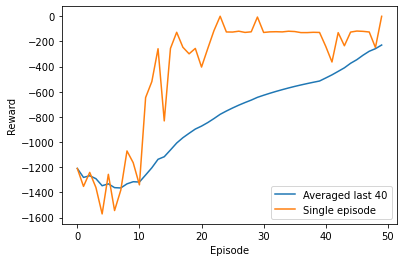

In [26]:
# Plotting graph
# Episodes versus Avg. Rewards
plt.plot(avg_reward_list)
plt.plot(ep_reward_list)
plt.legend(["Averaged last 40", "Single episode"])
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

### 2.5 Playing

In [28]:
play(env2, target_actor, False, -0.005)

Let's play: -1.98, -1.96, -1.87, -0.91, 0.24, -1.20, 0.66, -1.42, 0.71, -1.41, 0.73, -1.39, 0.68, -1.35, 0.68, -1.33, 0.65, -1.30, 0.64, -1.29, 0.63, -1.28, 0.62, -1.27, 0.62, -1.26, 0.61, -1.26, 0.61, -1.26, 0.61, -1.25, 0.61, -1.25, 0.61, -1.25, 0.61, -1.25, 0.61, -1.25, 0.61, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25, 0.60, -1.25

The Inverted Pendulum problem has low complexity, but DDPG work great on many other problems.

Another great environment to try this on is LunarLandingContinuous-v2, but it will take more episodes to obtain good results.

In [ ]:
env2.close()